# **Khám phá dữ liệu**

Để khám phá xem cấu trúc dữ liệu, và hiểu dữ liệu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # đếm số lượng
import re # sử dụng trong xử lý file
from numpy.lib import recfunctions as rfn # lưu trường (cột) mới vào trong data
import sys
import os

current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
if project_root not in sys.path:
    sys.path.append(project_root)


from src.data_processing import *
# --- Cài đặt cấu hình trực quan hóa ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


**Quan sát dữ liệu trong file `vaccination_tweets.csv` ta để ý rằng, trong trường `user_description`, `user_location`, `text`, `hashtags`, các dữ liệu đều được phân cách bởi dấu `,` nên tôi có phương án xử lý như sau:**
- Bỏ các ký tự xuống dòng và thay bằng ký hiệu `\n`
- Vì các trường ở trên, dữ liệu được bao quanh bởi dấu `"`, nên tôi sẽ tìm dữ liệu trong dấu `"` và đổi tất cả dấu `,` thành dấu `;`
- Lưu vào file mới và xử lý trên file đó

In [ ]:
# input_file = r"..\data\raw\vaccination_tweets.csv" 
# output_file  = r"..\data\raw\pfizer_tweets_clean.csv" 

# clean_rows = []
# current = ""
# inside_quote = False

# with open(input_file, "r", encoding="utf-8") as f:
#     for line in f:
#         # Bỏ ký tự xuống dòng ở cuối
#         l = line.rstrip("\n")

#         # Đếm số dấu " trong dòng
#         quote_count = l.count('"')

#         # Nếu chưa ở trong quote, thêm dòng mới
#         if not inside_quote:
#             current = l
#         else:
#             current += "\\n" + l   # nối dòng tweet bị xuống dòng

#         # Cập nhật trạng thái quote
#         if quote_count % 2 == 1:   # số lẻ → bật/tắt quote
#             inside_quote = not inside_quote

#         # Nếu đã đóng quote → dòng hoàn chỉnh
#         if not inside_quote:
#             clean_rows.append(current)


# #Thay dấu phẩy trong "..." thành `;` 
# def replace_commas(match):
#     inner = match.group(0)[1:-1]      # bỏ dấu "
#     inner = inner.replace(",", ";")   # thay đổi
#     return f'"{inner}"'

# final_rows = []
# for row in clean_rows:
#     row2 = re.sub(r'"[^"]*"', replace_commas, row)
#     final_rows.append(row2)


# with open(output_file, "w", encoding="utf-8") as f:
#     for r in final_rows:
#         f.write(r + "\n")


In [6]:
data = np.genfromtxt(
    r"..\data\raw\pfizer_tweets_clean.csv", 
    delimiter=',',
    dtype=None,
    names=True,
    encoding='utf-8',
    comments=None,
    converters={
        3: lambda x: x.decode('utf-8') if isinstance(x, bytes) else str(x),  # user_description
        10: lambda x: x.decode('utf-8') if isinstance(x, bytes) else str(x), # text
        11: lambda x: x.decode('utf-8') if isinstance(x, bytes) else str(x)  # hashtags
    },
    missing_values='',
    filling_values= None

)


print("\n5 dòng đầu tiên:")
print("Header: ", data.dtype.names)
for i in range(min(10, len(data))):
    print(f"Row {i}: {data[i]}")




5 dòng đầu tiên:
Header:  ('id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet')
Row 0: (1340539111971516416, 'Rachel Roh', '"La Crescenta-Montrose; CA"', '"Aggregator of Asian American news; scanning diverse sources 24/7/365. RT\'s; Follows and \'Likes\' will fuel me 👩\u200d💻"', '2009-04-08 17:52:46', 405, 1692, 3247, False, '2020-12-20 06:06:44', 'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF', "['PfizerBioNTech']", 'Twitter for Android', 0, 0, False)
Row 1: (1338158543359250433, 'Albert Fong', '"San Francisco; CA"', '"Marketing dude; tech geek; heavy metal & \'80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own."', '2009-09-21 15:27:30', 834, 666, 178, False, '2020-12-13 16:27:13', '"While the world has been on the wrong side of

**Ta sẽ gán `data` cho `raw_data`, rồi sử dụng trên `raw_data`**

In [7]:
raw_data = data.copy()
print(raw_data)

[(1340539111971516416, 'Rachel Roh', '"La Crescenta-Montrose; CA"', '"Aggregator of Asian American news; scanning diverse sources 24/7/365. RT\'s; Follows and \'Likes\' will fuel me 👩\u200d💻"', '2009-04-08 17:52:46',    405, 1692, 3247, False, '2020-12-20 06:06:44', 'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF', "['PfizerBioNTech']", 'Twitter for Android', 0, 0, False)
 (1338158543359250433, 'Albert Fong', '"San Francisco; CA"', '"Marketing dude; tech geek; heavy metal & \'80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own."', '2009-09-21 15:27:30',    834,  666,  178, False, '2020-12-13 16:27:13', '"While the world has been on the wrong side of history this year; hopefully; the biggest vaccination effort we\'ve ev… https://t.co/dlCHrZjkhm"', '', 'Twitter Web App', 1, 1, False)
 (1337858199140118533, 'eli🇱🇹🇪🇺👌', 'Your Bed', '"heil; hydra 🖐☺"', '2020-06-25 23:30:28',     10,   88,  155, False

---
### **Cùng nhau tìm hiểu dữ liệu thôi**

In [ ]:
print("Số cột:", len(raw_data.dtype.names))
print("Số hàng: ", len(raw_data))

Số cột: 16
Số hàng:  11020


In [ ]:
print("Tên các cột")
raw_data.dtype.names

Tên các cột


('id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet')

In [ ]:
print("Các kiểu dữ liệu của các cột")
raw_data.dtype.descr

Các kiểu dữ liệu của các cột


[('id', '<i8'),
 ('user_name', '<U52'),
 ('user_location', '<U120'),
 ('user_description', '<U229'),
 ('user_created', '<U19'),
 ('user_followers', '<i8'),
 ('user_friends', '<i8'),
 ('user_favourites', '<i8'),
 ('user_verified', '|b1'),
 ('date', '<U19'),
 ('text', '<U156'),
 ('hashtags', '<U140'),
 ('source', '<U31'),
 ('retweets', '<i8'),
 ('favorites', '<i8'),
 ('is_retweet', '|b1')]

Ta thấy rằng ở cột `user_created`, `date` là kiểu str nên ta phải chuyển sang dạng ngày tháng, đồng thời cũng gán `new_data` cho dữ liệu bị thay đổi

In [9]:
user_created_str = raw_data['user_created']
date_str = raw_data['date']

# Chuyển đổi sang datetime
user_created_dt = user_created_str.astype('datetime64[s]')
date_dt = date_str.astype('datetime64[s]')


new_dtype = raw_data.dtype.descr  
new_dtype_list = list(new_dtype) 

for i, (name, dtype) in enumerate(new_dtype_list):
    if name == 'user_created' or name == 'date':
        new_dtype_list[i] = (name, 'datetime64[s]') 
        
new_data = np.empty(raw_data.shape, dtype=new_dtype_list)

# Sao chép các trường cũ và gán các trường mới
for name in raw_data.dtype.names:
    if name != 'user_created' and name != 'date':
        new_data[name] = raw_data[name]

new_data['user_created'] = user_created_dt
new_data['date'] = date_dt

print("Kiểu dữ liệu mới của cột 'user_created':", new_data['user_created'].dtype)
print("Kiểu dữ liệu mới của cột 'date':", new_data['date'].dtype)

Kiểu dữ liệu mới của cột 'user_created': datetime64[s]
Kiểu dữ liệu mới của cột 'date': datetime64[s]


In [ ]:


print(f"{'Cột':<30}{'Số Lượng Thiếu':>15}{'Tỉ Lệ Thiếu':>15}")
print("-" * 60)

total_rows = len(new_data)

for col_name in new_data.dtype.names:
    col_data = new_data[col_name]
    missing_count = 0
    
    # Kiểm tra kiểu dữ liệu của cột
    dtype_kind = col_data.dtype.kind
    
    if dtype_kind in 'fi': # f: float i: integer 
        # Đối với cột số, kiểm tra np.nan
        if dtype_kind == 'i':
            pass
        try:
            missing_count = np.sum(np.isnan(col_data))
        except TypeError:
            pass
             
    elif dtype_kind in 'SU': # S: string/bytes; U: unicode string
        # kiểm tra chuỗi rỗng ('')
        
        is_empty_string = (col_data == b'') # Kiểm tra cho bytes (S)
        is_empty_unicode = (col_data == '') # Kiểm tra cho Unicode (U)

        missing_count = np.sum(is_empty_string) + np.sum(is_empty_unicode)

    # In kết quả nếu có giá trị thiếu
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{col_name:<30}{missing_count:>15}{missing_percentage:>15.2f}%")

print("-" * 60)

Cột                            Số Lượng Thiếu    Tỉ Lệ Thiếu
------------------------------------------------------------
user_location                            2270          20.60%
user_description                          679           6.16%
hashtags                                 2582          23.43%
source                                      1           0.01%
------------------------------------------------------------


### **Ta có những nhận định sau:**

**Hashtag bị miss 23.43%**: Gần một phần tư số lượng tweet không sử dụng hashtag. Điều này cho thấy đa số người dùng chỉ là chia sẻ cảm xúc, tin tức cá nhân.

**Note**: các trường bị thiếu là các trường liên quan tới dữ liệu text, các trường dữ liệu số thì đủ

---

### **Khám phá xem các trường số như `user_followers`, `user_friends`, `user_favourites`, `retweets`, `favorites`**

In [10]:
numerical_col = ['user_followers', 'user_friends', 'user_favourites', 'retweets', 'favorites']

print(f"{'Column Name':<20}{'Min':>12}{'Max':>12}{'Mean':>14}{'Median':>12}{'Q1':>12}{'Q3':>12}")
print("-" * 95)
for col in numerical_col:
    col_data = new_data[col]
    min_val = np.min(col_data)
    max_val = np.max(col_data)
    mean_val = np.mean(col_data)
    median_val = np.median(col_data)
    Q1 = np.quantile(col_data, 0.25)
    Q3 = np.quantile(col_data, 0.75)

    
   
    print(
        f"{col:<20}"
        f"{min_val:>12.0f}"  
        f"{max_val:>12.0f}"
        f"{mean_val:>14.2f}"
        f"{median_val:>12.2f}"
        f"{Q1:>12.2f}"
        f"{Q3:>12.2f}"

    )

Column Name                  Min         Max          Mean      Median          Q1          Q3
-----------------------------------------------------------------------------------------------
user_followers                 0    13714928      35188.27      479.00      111.00     2171.25
user_friends                   0      103226       1170.47      460.00      164.00     1221.00
user_favourites                0     1213794      15332.89     2323.50      436.00    11140.75
retweets                       0         678          1.36        0.00        0.00        1.00
favorites                      0        2315          7.51        1.00        0.00        4.00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8100\2635759003.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, vert=False, labels=clean_cols, notch=True, patch_artist=True)


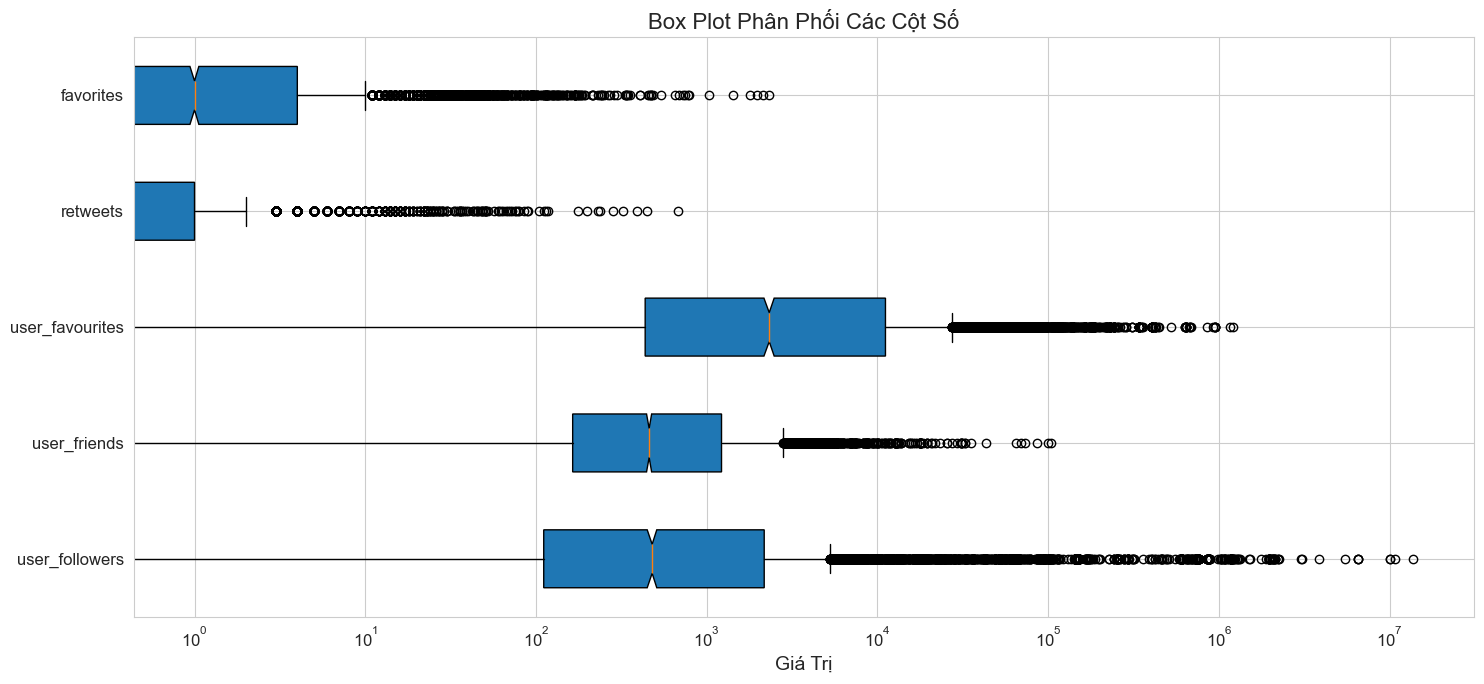

In [11]:
plot_data = []
clean_cols = []
for col in numerical_col:
    col_data = new_data[col]
    plot_data.append(col_data)
    clean_cols.append(col)

# vẽ boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(plot_data, vert=False, labels=clean_cols, notch=True, patch_artist=True)

plt.title('Box Plot Phân Phối Các Cột Số', fontsize=16)
plt.xlabel('Giá Trị', fontsize=14)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.set_xscale('log') 

plt.tight_layout()
plt.show()

### **Ta có thể có những nhận định sau:**
- Dữ liệu ở tất cả các cột đều có sự **lệch dương mạnh**. Điều này là đặc trưng của dữ liệu mạng xã hội, nơi một số lượng rất nhỏ các tweet/tài khoản nhận được sự tương tác hoặc có ảnh hưởng cực lớn, kéo giá trị trung bình lên cao. Trung vị là chỉ số đáng tin cậy nhất.
- **`user_followers`**: hầu hết người dùng là *người bình thường*, hơn *50%* các tweet đến từ các tài khoản có dưới hơn *479 followers*
- **`user_friends`**: Hơn *50%* các tài khoản có* bạn bè ít hơn 460 người*, vậy nên đây là các tài khoản cá nhân
- **`user_favourites`**: có *median: 2.323*. Các tài khoản là người dùng hoạt động tương đối thường xuyên, nhưng có số ít tài khoản hoạt động rất sôi nổi *(max: 1,2tr)*
- **`retweets`**,**`favorites`**: Phần lớn tweet bị bỏ qua, nhưng một số ít tweet đã lan truyền mạnh mẽ và thu hút được sự chú ý lớn


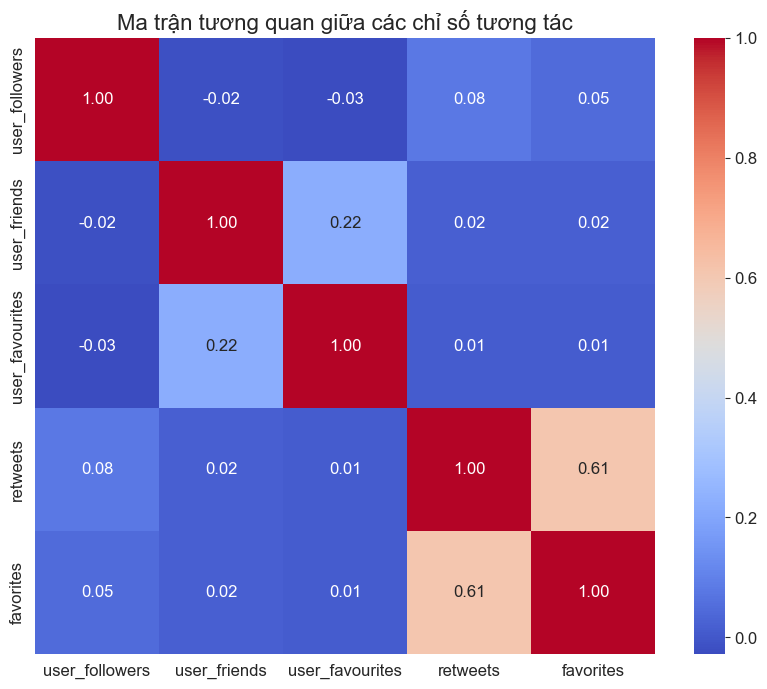

In [53]:
# Chọn các cột số quan trọng
num_cols = ['user_followers', 'user_friends', 'user_favourites', 'retweets', 'favorites']
data_matrix = np.column_stack([new_data[col] for col in num_cols])

# Tính ma trận tương quan (dùng numpy)
corr_matrix = np.corrcoef(data_matrix, rowvar=False)

# Vẽ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=num_cols, yticklabels=num_cols)
plt.title('Ma trận tương quan giữa các chỉ số tương tác', fontsize=16)
plt.show()


In [12]:
# ================================
# 1) TÍNH ENGAGEMENT
# ================================

ret = new_data['retweets'].astype(np.float64)
fav = new_data['favorites'].astype(np.float64)

engagement= (ret + fav) 

# Thêm vào structured array
new_data = rfn.append_fields(new_data, "engagement", engagement, usemask=False)

print("Thêm cột engagement thành công!")


Thêm cột engagement thành công!


In [13]:
# ================================
# 1) TÍNH ENGAGEMENT RATE
# ================================

followers = new_data['user_followers'].astype(np.float64)

# tránh chia cho 0 → follower = 0 => đặt thành 1
followers_safe = np.where(followers == 0, 1, followers)

engagement_rate = engagement / followers_safe

# Thêm vào structured array
new_data = rfn.append_fields(new_data, "engagement_rate", engagement_rate, usemask=False)

print("Thêm cột engagement_rate thành công!")


Thêm cột engagement_rate thành công!


In [14]:


# ==========================================
# 1. TÍNH REPUTATION RATIO
# ==========================================

friends = new_data['user_friends'].astype(float)

# Cộng 1 vào friends để tránh chia cho 0 (Smoothing)
# Công thức: Reputation = Followers / (Friends + 1)
reputation_ratio = followers / (friends + 1)

# Thêm vào dữ liệu
# Kiểm tra xem trường đã tồn tại chưa để tránh lỗi
if 'reputation_ratio' not in new_data.dtype.names:
    new_data = rfn.append_fields(new_data, "reputation_ratio", reputation_ratio, usemask=False)
    print("Đã thêm cột 'reputation_ratio' thành công!")
else:
    print("Cột 'reputation_ratio' đã tồn tại.")

print(f"Max Reputation: {np.max(reputation_ratio):.2f}")
print(f"Median Reputation: {np.median(reputation_ratio):.2f}")

Đã thêm cột 'reputation_ratio' thành công!
Max Reputation: 195927.54
Median Reputation: 0.81


In [15]:


conditions = [
    followers <= 100,
    (followers > 100) & (followers <= 1000),
    (followers > 1000) & (followers <= 10000),
    followers > 10000
]

# 3. Định nghĩa các nhãn tương ứng
choices = ['weak', 'norm', 'strong', 'influencer']

# 4. Áp dụng np.select để tạo cột phân loại mới
# 'acc_class' sẽ chứa nhãn phân loại
acc_class = np.select(conditions, choices, default='unknown')

# 5. Thêm trường mới 'acc_class' vào mảng new_data
new_data = rfn.append_fields(
    base=new_data, 
    names='acc_class', 
    data=acc_class, 
    dtypes='<U15', 
    usemask=False
)

# 6. Hiển thị kết quả (tương đương với df.head())
print("--- PHÂN LOẠI TÀI KHOẢN (acc_class) ---")
print(f"{'Followers':<12} {'Account Class':<15}")
print("-" * 27)

# In 10 hàng đầu tiên để kiểm tra
for i in range(10):
    print(f"{new_data['user_followers'][i]:<12} {new_data['acc_class'][i]:<15}")

--- PHÂN LOẠI TÀI KHOẢN (acc_class) ---
Followers    Account Class  
---------------------------
405          norm           
834          norm           
10           weak           
49165        influencer     
152          norm           
105          norm           
2731         strong         
21924        influencer     
887          norm           
671          norm           


In [16]:
# Đếm số lượng user trong mỗi nhóm
unique_classes, counts = np.unique(new_data['acc_class'], return_counts=True)
print("=== PHÂN BỐ SỐ LƯỢNG USER THEO NHÓM ===")
for acc_class, count in zip(unique_classes, counts):
    percentage = (count / len(new_data)) * 100
    print(f"{acc_class:<12}: {count:>6} users ({percentage:.1f}%)")

# Tính các metrics trung bình theo nhóm
print("\n=== METRICS TRUNG BÌNH THEO NHÓM ===")
metrics = ['retweets', 'favorites', 'user_friends', 'user_favourites']

for metric in metrics:
    print(f"\n--- {metric.upper()} ---")
    for acc_class in unique_classes:
        # Lấy mask cho từng nhóm
        mask = new_data['acc_class'] == acc_class
        values = new_data[metric][mask].astype(float)
        mean_val = np.mean(values) if len(values) > 0 else 0
        print(f"{acc_class:<12}: {mean_val:.2f}")

=== PHÂN BỐ SỐ LƯỢNG USER THEO NHÓM ===
influencer  :   1242 users (11.3%)
norm        :   4343 users (39.4%)
strong      :   2883 users (26.2%)
weak        :   2552 users (23.2%)

=== METRICS TRUNG BÌNH THEO NHÓM ===

--- RETWEETS ---
influencer  : 6.05
norm        : 0.47
strong      : 1.68
weak        : 0.23

--- FAVORITES ---
influencer  : 21.69
norm        : 4.46
strong      : 11.01
weak        : 1.85

--- USER_FRIENDS ---
influencer  : 2551.07
norm        : 766.99
strong      : 2056.66
weak        : 184.07

--- USER_FAVOURITES ---
influencer  : 22643.55
norm        : 10476.42
strong      : 30899.18
weak        : 2454.43


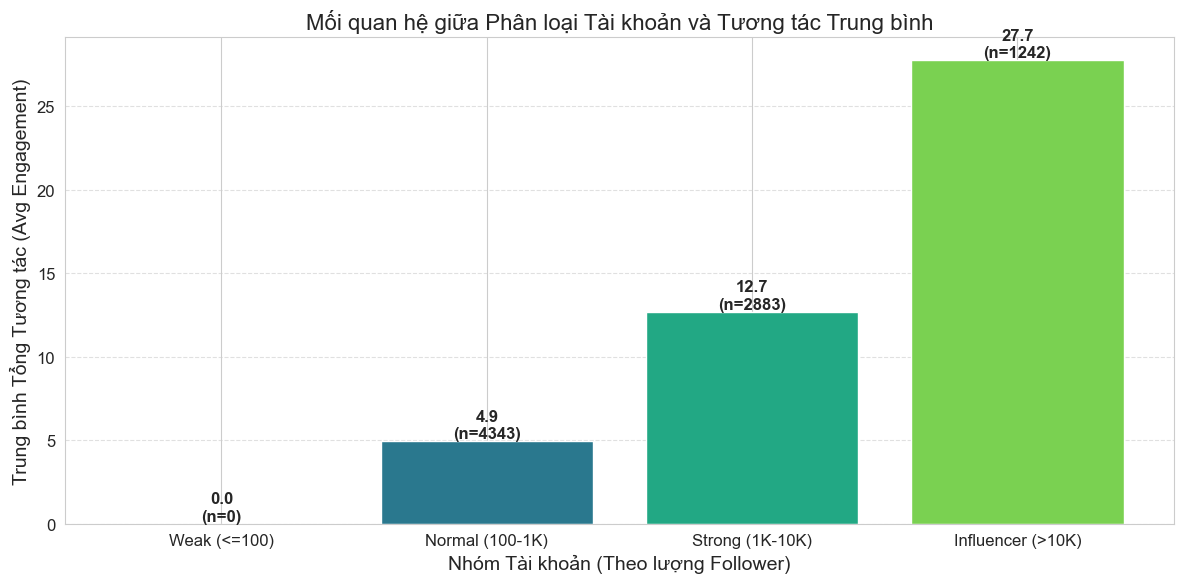

=== KẾT QUẢ PHÂN TÍCH ===
Nhóm Weak (<=100)        : Trung bình 0.00 tương tác/tweet
Nhóm Normal (100-1K)     : Trung bình 4.93 tương tác/tweet
Nhóm Strong (1K-10K)     : Trung bình 12.69 tương tác/tweet
Nhóm Influencer (>10K)   : Trung bình 27.74 tương tác/tweet


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.lib import recfunctions as rfn

# Giả sử new_data đã có các cột 'acc_class' và 'engagement'
# Nếu chưa có, hãy đảm bảo bạn đã chạy các bước tạo cột trước đó.

# 1. Chuẩn bị dữ liệu
# Lấy các nhãn nhóm duy nhất và định nghĩa thứ tự logic
# week <= 100, norm 100-1000, strong 1000-10000, influencer > 10000
ordered_classes = ['week', 'norm', 'strong', 'influencer']
class_labels_display = ['Weak (<=100)', 'Normal (100-1K)', 'Strong (1K-10K)', 'Influencer (>10K)']

# 2. Tính Engagement trung bình cho mỗi nhóm
avg_eng_by_class = []
counts_by_class = []

for cls in ordered_classes:
    # Tạo mask lọc dữ liệu theo nhóm
    mask = new_data['acc_class'] == cls
    
    if np.sum(mask) > 0:
        avg_eng = np.mean(new_data['engagement'][mask])
        count = np.sum(mask)
    else:
        avg_eng = 0
        count = 0
        
    avg_eng_by_class.append(avg_eng)
    counts_by_class.append(count)

# 3. Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cột
bars = plt.bar(class_labels_display, avg_eng_by_class, color=sns.color_palette('viridis', 4))

plt.title('Mối quan hệ giữa Phân loại Tài khoản và Tương tác Trung bình', fontsize=16)
plt.xlabel('Nhóm Tài khoản (Theo lượng Follower)', fontsize=14)
plt.ylabel('Trung bình Tổng Tương tác (Avg Engagement)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Hiển thị giá trị trên mỗi cột
for bar, val, count in zip(bars, avg_eng_by_class, counts_by_class):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{val:.1f}\n(n={count})', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 4. In nhận xét sơ bộ
print("=== KẾT QUẢ PHÂN TÍCH ===")
for label, val in zip(class_labels_display, avg_eng_by_class):
    print(f"Nhóm {label:<20}: Trung bình {val:.2f} tương tác/tweet")

---

### **Bây giờ ta sẽ đánh giá về thời gian tạo tweet cũng như là số tuổi của tài khoản**

In [17]:

date_col = new_data['date']


min_date = np.min(date_col)
max_date = np.max(date_col)

print(f"Ngày đăng tweet sớm nhất nhất: {min_date}")
print(f"Ngày đăng tweet muộn nhất: {max_date}")


data_range = (max_date - min_date).astype('timedelta64[D]')
print(f"Phạm vi thu thập: {data_range}")





Ngày đăng tweet sớm nhất nhất: 2020-12-12T11:55:28
Ngày đăng tweet muộn nhất: 2021-11-23T20:30:48
Phạm vi thu thập: 346 days


12/12 Cơ quan Quản lý thực phẩm và dược phẩm (FDA) Mỹ cấp phép sử dụng khẩn cấp cho vắcxin của hãng Pfizer/BioNTech, vắcxin COVID-19 đầu tiên tại nước này.

Ủy ban tư vấn của Centers for Disease Control and Prevention (ACIP) đã bỏ phiếu chấp thuận khuyến nghị sử dụng khẩn cấp cho loại vaccine COVID-19 của Pfizer-BioNTech (BNT162b2) ở Hoa Kỳ cho người từ 16 tuổi trở lên.


Việc này diễn ra sau khi Food and Drug Administration (FDA) cấp phép sử dụng khẩn cấp (EUA) cho vaccine vào ngày 11 tháng 12 năm 2020.

Cùng ngày (12/12/2020), ở Canada, Health Canada đăng thông báo khuyến cáo về nguy cơ phản ứng dị ứng nghiêm trọng (anaphylaxis) đối với vaccine của Pfizer-BioNTech.

In [18]:
user_created_col = new_data['user_created']
min_created = np.min(user_created_col)
max_created = np.max(user_created_col)

print(f"Ngày tạo user account sớm nhất: {min_created}")
print(f"Ngày tạo user account muộn nhất: {max_created}")


Ngày tạo user account sớm nhất: 2006-07-15T21:06:00
Ngày tạo user account muộn nhất: 2021-11-18T22:02:07


In [19]:
# Tính toán Tuổi tài khoản
account_age = new_data['date'] - new_data['user_created']

# Cột mới phải được thêm bằng hàm chuyên biệt
new_data = rfn.append_fields(
    base=new_data, 
    names='acc_age', 
    data=account_age, 
    usemask=False
)

print(f"Tuổi tài khoản Trung bình (Mean Age): {(np.mean(account_age)).astype('timedelta64[D]')}")
print(f"Tuổi tài khoản Trung vị (Median Age): {(np.median(account_age)).astype('timedelta64[D]')}")
print(f"Tuổi tài khoản Nhỏ nhất (Min Age): {np.min(account_age)}")
print(f"Tuổi tài khoản Lớn nhất (Max Age): {(np.max(account_age)).astype('timedelta64[D]')}")


Tuổi tài khoản Trung bình (Mean Age): 2532 days
Tuổi tài khoản Trung vị (Median Age): 2865 days
Tuổi tài khoản Nhỏ nhất (Min Age): 139 seconds
Tuổi tài khoản Lớn nhất (Max Age): 5417 days


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8100\590218480.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([age_in_seconds], vert=False, labels=['Account Age '],


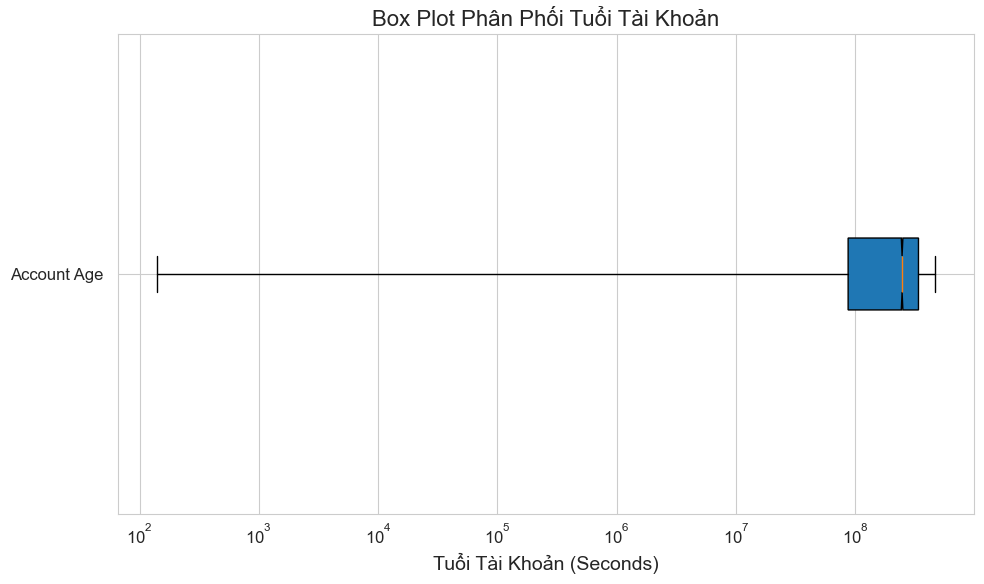

In [20]:
# Áp dụng .astype('timedelta64[s]') để đảm bảo tất cả đều là giây trước khi chuyển sang float
age_in_seconds = account_age.astype('timedelta64[s]').astype(float)

# Vẽ boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([age_in_seconds], vert=False, labels=['Account Age '], 
            notch=True, patch_artist=True)

plt.title('Box Plot Phân Phối Tuổi Tài Khoản', fontsize=16)
plt.xlabel('Tuổi Tài Khoản (Seconds)', fontsize=14)

# Thiết lập log scale cho trục X 
ax = plt.gca()
ax.set_xscale('log') 

plt.tight_layout()
plt.show()

### **Ta có những nhận định sau:**
- Tuổi trung bình của tài khoản khá lâu (>10^8, vài năm)
- Ta có thể thấy là có nhiều tài khoản là có thể là bot: tài khoản được tạo mới nhất là 139s cho tới lúc đăng tweet, cũng như có nhiều tài khoản có mốc thời gian vào khoảng 10^2 tới 10^3 giấy (vài phút) 


---


### **Số lượng tweet trong ngày thì sao?**

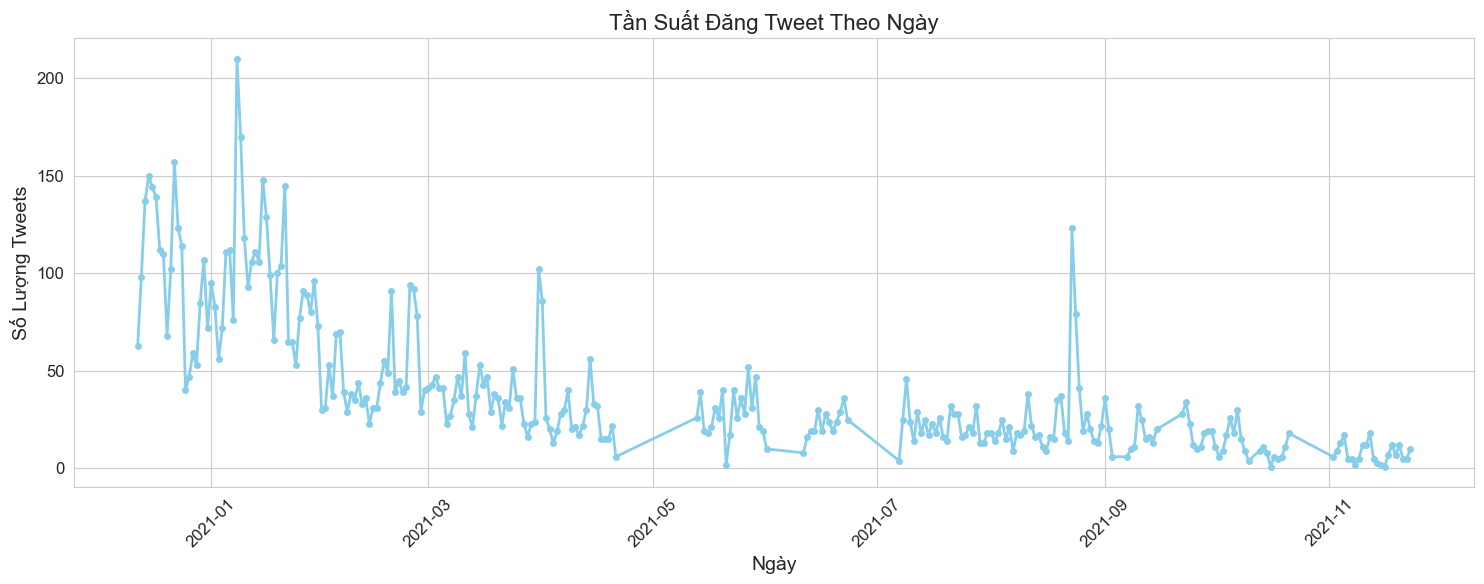

In [23]:
date_col = data['date']
# Chuyển đổi datetime64 sang số ngày (để nhóm)
dates_as_days = date_col.astype('datetime64[D]')

# Đếm tần suất mỗi ngày 
unique_dates, counts = np.unique(dates_as_days, return_counts=True)

# Chuyển lại các ngày duy nhất thành datetime objects để vẽ biểu đồ
unique_dates_dt = unique_dates.astype(object)

#  vẽ niểu đồ đường
plt.figure(figsize=(15, 6))
plt.plot(unique_dates_dt, counts, marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=4)

plt.title('Tần Suất Đăng Tweet Theo Ngày', fontsize=16)
plt.xlabel('Ngày', fontsize=14)
plt.ylabel('Số Lượng Tweets', fontsize=14)
plt.xticks(rotation=45) # Xoay nhãn ngày để dễ đọc
plt.tight_layout()
plt.show()


In [24]:
# Tìm chỉ số (index) của ngày có số lượng tweet cao nhất
max_count_index = np.argmax(counts)

# Lấy ngày và số lượng tweet tương ứng
peak_date = unique_dates_dt[max_count_index]
peak_count = counts[max_count_index]

print(f"Ngày có lượng tweet cao nhất là: {peak_date} với {peak_count} tweets.")

Ngày có lượng tweet cao nhất là: 2021-01-08 với 210 tweets.


Hai hãng Pfizer và BioNTech công bố kết quả từ một nghiên cứu in vitro cho thấy kháng thể huyết thanh từ người được tiêm vaccine COVID-19 của họ có khả năng trung hoà virus SARS-CoV-2 mang đột biến N501Y — một đột biến được tìm thấy trong các biến thể lây lan nhanh ở Anh và Nam Phi.

Đột biến N501Y lúc đó rất đáng lo vì nó xuất hiện trong biến thể Anh (Alpha) và Nam Phi (Beta) — đều lây nhanh hơn.

Pfizer/BioNTech chứng minh:
✔ Kháng thể từ người đã tiêm vẫn trung hòa được virus có đột biến này
✔ Vaccine không bị vô hiệu hóa
✔ Đây là tin tốt trong bối cảnh lo sợ biến thể mới

=== DANH SÁCH CÁC NGÀY CAO ĐIỂM (SẮP XẾP THEO SỐ LƯỢNG GIẢM DẦN) ===
Hạng  | Ngày (Date)     | Số lượng (Count)
---------------------------------------------
#1    | 2021-01-08      | 210
#2    | 2020-12-22      | 157
#3    | 2020-12-15      | 150
#4    | 2021-01-15      | 148
#5    | 2021-01-21      | 145
#6    | 2021-08-23      | 123
#7    | 2021-01-06      | 112
#8    | 2021-01-13      | 111
#9    | 2020-12-30      | 107
#10   | 2021-03-31      | 102
#11   | 2021-01-29      | 96
#12   | 2021-01-01      | 95
#13   | 2021-02-24      | 94
#14   | 2021-01-26      | 91
#15   | 2021-02-19      | 91
#16   | 2021-02-05      | 70
#17   | 2020-12-27      | 59
#18   | 2021-03-11      | 59


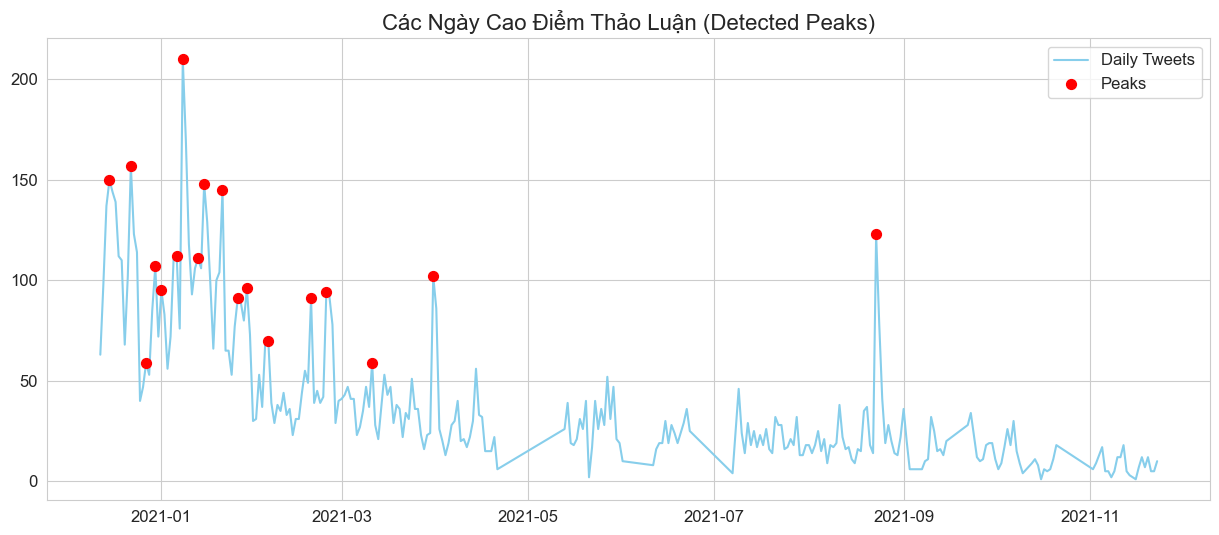

In [29]:
import numpy as np

# Giả sử bạn đã có 'counts' và 'unique_dates_dt' từ đoạn code trước
# Nếu chưa chạy, hãy đảm bảo biến 'counts' (số lượng tweet mỗi ngày) đã được tính

# 1. Tìm các đỉnh địa phương (Local Maxima)
# Một điểm là đỉnh nếu nó lớn hơn điểm liền trước VÀ lớn hơn điểm liền sau
# counts[1:-1] là các điểm ở giữa (bỏ đầu và cuối)
# counts[:-2] là các điểm bên trái
# counts[2:] là các điểm bên phải
is_peak = (counts[1:-1] > counts[:-2]) & (counts[1:-1] > counts[2:])

# Lấy index của các đỉnh (cộng thêm 1 vì mảng is_peak bị thụt 1 so với counts gốc)
peak_indices = np.where(is_peak)[0] + 1

# 2. Lọc các đỉnh "có ý nghĩa" (Significant Peaks)
# Chỉ lấy những đỉnh cao hơn mức trung bình + độ lệch chuẩn (để bỏ nhiễu)
threshold = np.mean(counts) + 0.5 * np.std(counts) # Ngưỡng tùy chỉnh (0.5 std là vừa phải)
significant_peak_indices = [i for i in peak_indices if counts[i] > threshold]

sorted_peaks_by_count = sorted(significant_peak_indices, key=lambda i: counts[i], reverse=True)

print(f"=== DANH SÁCH CÁC NGÀY CAO ĐIỂM (SẮP XẾP THEO SỐ LƯỢNG GIẢM DẦN) ===")
print(f"{'Hạng':<5} | {'Ngày (Date)':<15} | {'Số lượng (Count)'}")
print("-" * 45)

for rank, idx in enumerate(sorted_peaks_by_count):
    date_str = str(unique_dates_dt[idx]).split('T')[0] # Lấy ngày
    count_val = counts[idx]                            # Lấy số lượng
    print(f"#{rank+1:<4} | {date_str:<15} | {count_val}")

# (Tùy chọn) Vẽ lại biểu đồ và đánh dấu các đỉnh này
plt.figure(figsize=(15, 6))
plt.plot(unique_dates_dt, counts, color='skyblue', label='Daily Tweets')
# Vẽ các chấm đỏ tại các đỉnh tìm được
plt.scatter(unique_dates_dt[significant_peak_indices], 
            counts[significant_peak_indices], 
            color='red', s=50, zorder=5, label='Peaks')

plt.title('Các Ngày Cao Điểm Thảo Luận (Detected Peaks)', fontsize=16)
plt.legend()
plt.show()

- 31/3/2021: Vaccine cho hiệu quả 100% trong nhóm tuổi 12-15 — trong số những người tham gia thử nghiệm, không có ca COVID-19 nào xảy ra trong nhóm được tiêm, trong khi có nhiều ca xảy ra ở nhóm đối chứng
- Vào ngày 23 tháng 8 năm 2021, xảy ra một sự kiện rất quan trọng đối với vaccine của Pfizer Inc. và BioNTech SE:

U.S. Food and Drug Administration (FDA) đã phê duyệt hoàn toàn (full approval) vaccine được biết tới với tên thương mại Comirnaty, cho người từ 16 tuổi trở lên, thay vì chỉ sử dụng dưới giấy phép khẩn cấp (EUA). 

Việc này đánh dấu lần đầu tiên một vaccine COVID-19 nhận được phê duyệt đầy đủ tại Hoa Kỳ. 


Việc phê duyệt đầy đủ giúp tăng mức độ tin cậy của công chúng vào vaccine, và mở đường cho nhiều nơi (nhà tuyển dụng, chính quyền) đưa ra yêu cầu tiêm chủng mạnh hơn. 


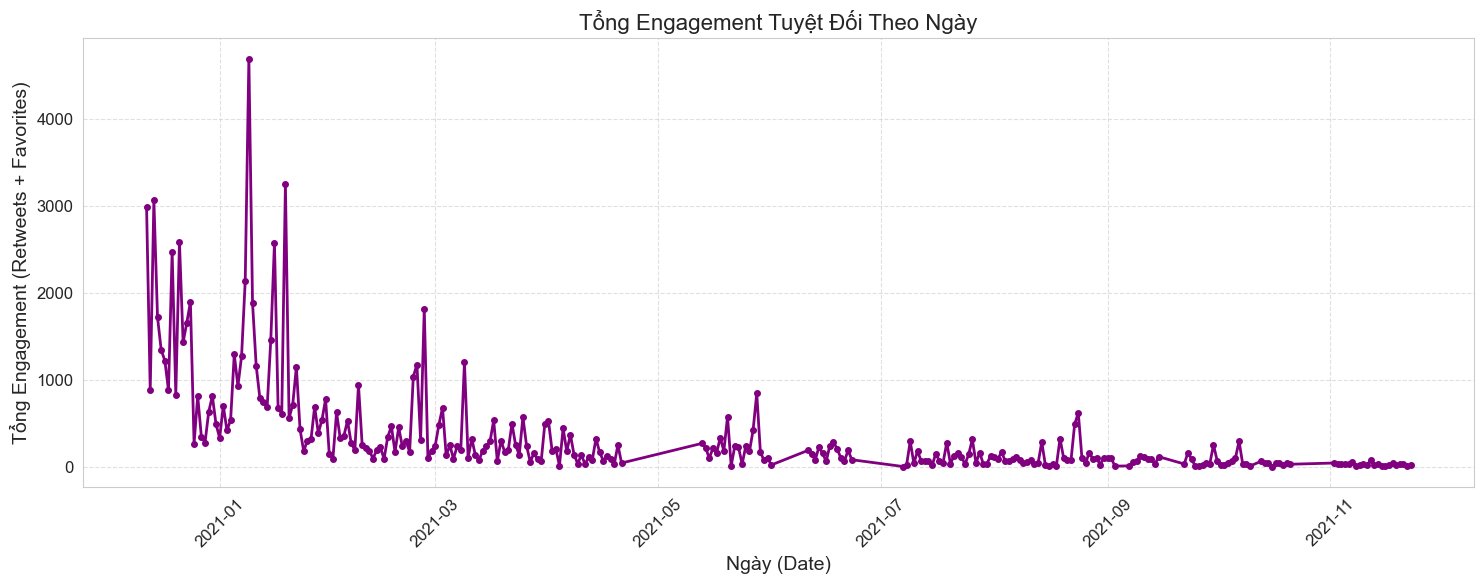

In [25]:
from collections import defaultdict


# Giả sử new_data là mảng NumPy có cấu trúc chứa 'date' (datetime64[s]) và 'engagement' (float/int)

# --- 1. Aggregation Logic (Manual Group By Date and Sum Engagement) ---
dates_full = new_data['date']
engagement_values = new_data['engagement'].astype(float) # Đảm bảo là float cho phép cộng

# Sử dụng defaultdict để tự động khởi tạo giá trị 0 cho tổng engagement
daily_engagement = defaultdict(float)

# Chuyển full datetime (có giờ) sang date string (YYYY-MM-DD) để gom nhóm theo ngày
dates_only = dates_full.astype('datetime64[D]').astype(str) 

for date_str, engagement_val in zip(dates_only, engagement_values):
    daily_engagement[date_str] += engagement_val # Cộng dồn engagement theo ngày

# --- 2. Preparation for Plotting: Sort by Date ---

# Sắp xếp các ngày theo thứ tự
sorted_dates_str = sorted(daily_engagement.keys())
# Trích xuất tổng engagement tương ứng
sorted_engagement_sums = [daily_engagement[d] for d in sorted_dates_str]

# --- 3. Visualization (Matplotlib Equivalent) ---

plt.figure(figsize=(15, 6))

# Plotting the time series (lines+markers)
# Chuyển string date về datetime object để Matplotlib tự động xử lý trục X
dates_for_plot = np.array(sorted_dates_str, dtype='datetime64[D]').astype(object)

plt.plot(dates_for_plot, sorted_engagement_sums, 
         marker='o', linestyle='-', color='purple', linewidth=2, markersize=4)

plt.title('Tổng Engagement Tuyệt Đối Theo Ngày', fontsize=16)
plt.xlabel('Ngày (Date)', fontsize=14)
plt.ylabel('Tổng Engagement (Retweets + Favorites)', fontsize=14)
plt.xticks(rotation=45) 
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

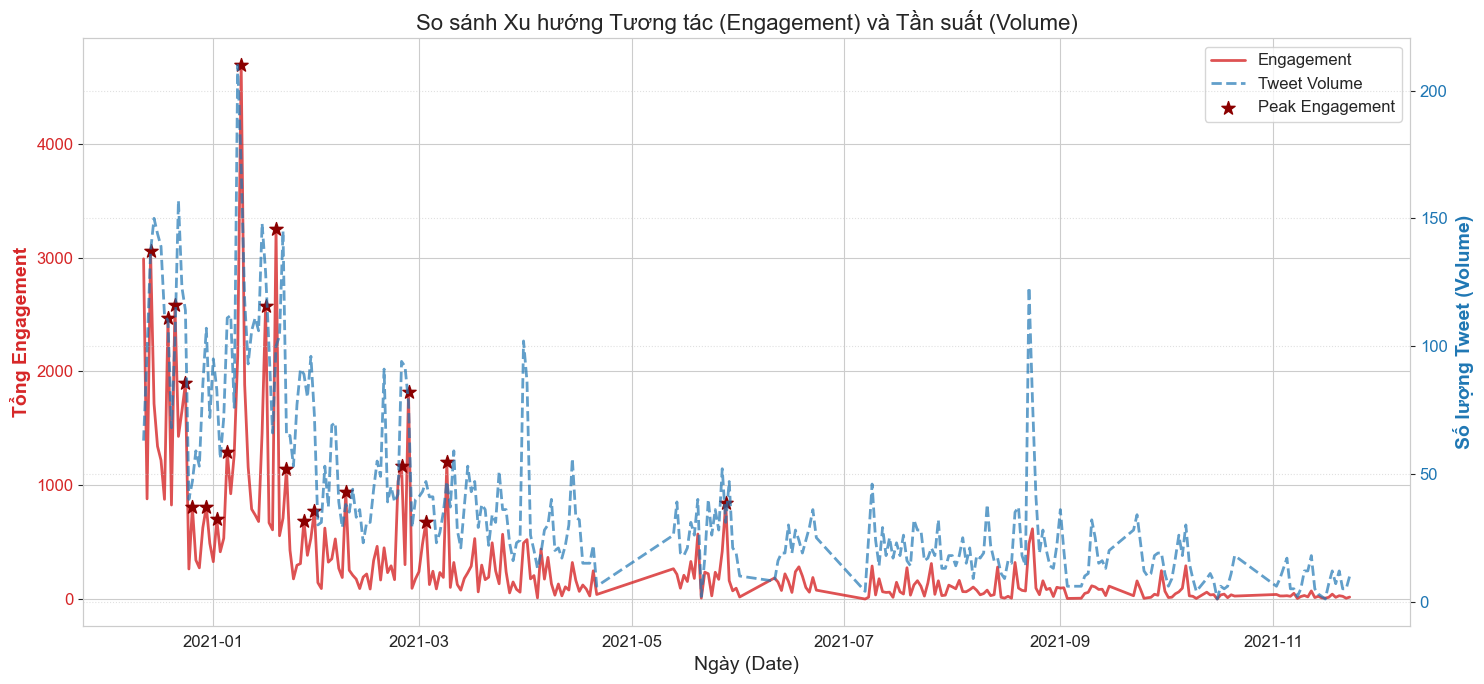

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# --- 1. Chuẩn bị dữ liệu ---
# Giả sử new_data đã có cột 'date' và 'engagement'
dates_full = new_data['date']
# Chuyển về ngày (bỏ giờ phút) để gom nhóm
dates_days = dates_full.astype('datetime64[D]')
engagement_values = new_data['engagement'].astype(float)

# --- 2. Gom nhóm theo ngày ---
daily_stats = defaultdict(lambda: [0.0, 0]) 

for d, eng in zip(dates_days, engagement_values):
    d_str = str(d)
    daily_stats[d_str][0] += eng # Cộng dồn Engagement
    daily_stats[d_str][1] += 1   # Đếm số lượng Tweet

# --- 3. Chuyển sang mảng ---
sorted_dates = sorted(daily_stats.keys())
eng_sums = np.array([daily_stats[d][0] for d in sorted_dates])
tweet_counts = np.array([daily_stats[d][1] for d in sorted_dates])
dates_dt = np.array(sorted_dates, dtype='datetime64[D]')

# --- 4. Tìm các Đỉnh Engagement (Peak Detection) ---
# ... (Giữ nguyên phần tìm đỉnh như cũ) ...
is_peak = (eng_sums[1:-1] > eng_sums[:-2]) & (eng_sums[1:-1] > eng_sums[2:])
peak_indices = np.where(is_peak)[0] + 1
threshold = np.mean(eng_sums) + 0.5 * np.std(eng_sums)
significant_peak_indices = [i for i in peak_indices if eng_sums[i] > threshold]
sorted_peak_indices = sorted(significant_peak_indices, key=lambda i: eng_sums[i], reverse=True)

# --- 5. Trực quan hóa (2 đường Line) ---
fig, ax1 = plt.subplots(figsize=(15, 7))

# Trục Y1 (Trái): Tổng Engagement (Đường màu Đỏ)
color_eng = 'tab:red'
ax1.set_xlabel('Ngày (Date)', fontsize=14)
ax1.set_ylabel('Tổng Engagement', color=color_eng, fontsize=14, fontweight='bold')
line1, = ax1.plot(dates_dt, eng_sums, color=color_eng, linewidth=2, alpha=0.8, label='Engagement')
ax1.tick_params(axis='y', labelcolor=color_eng)

# Đánh dấu các đỉnh Engagement
scat = ax1.scatter(dates_dt[sorted_peak_indices], eng_sums[sorted_peak_indices], 
            color='darkred', s=100, zorder=5, marker='*', label='Peak Engagement')

# Trục Y2 (Phải): Số lượng Tweet (Đường màu Xanh) - Thay vì Bar Chart
ax2 = ax1.twinx()  
color_vol = 'tab:blue'
ax2.set_ylabel('Số lượng Tweet (Volume)', color=color_vol, fontsize=14, fontweight='bold')
line2, = ax2.plot(dates_dt, tweet_counts, color=color_vol, linewidth=2, linestyle='--', alpha=0.7, label='Tweet Volume')
ax2.tick_params(axis='y', labelcolor=color_vol)

# Thêm Legend chung
lines = [line1, line2, scat]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('So sánh Xu hướng Tương tác (Engagement) và Tần suất (Volume)', fontsize=16)
plt.grid(True, linestyle=':', alpha=0.6)
fig.tight_layout()
plt.show()


In [40]:
import numpy as np
from collections import Counter
import re
from datetime import datetime

# --- DANH SÁCH NGÀY CẦN SOI ---
target_dates = ['2021-08-23', '2021-03-31', '2021-02-19', '2021-01-29', '2021-01-26']

# --- HÀM HỖ TRỢ ---
def analyze_day(target_date, data):
    # 1. Lọc dữ liệu của ngày đó
    dates_str = data['date'].astype('datetime64[D]').astype(str)
    mask = dates_str == target_date
    day_data = data[mask]
    
    if len(day_data) == 0:
        print(f"Không có dữ liệu cho ngày {target_date}")
        return

    # 2. Tính toán các chỉ số
    n_tweets = len(day_data)
    
    # --- Giả thuyết 1: Bot/Spam (Kiểm tra trùng lặp & Tuổi tài khoản) ---
    unique_texts = len(np.unique(day_data['text']))
    duplicate_rate = 1 - (unique_texts / n_tweets) # Tỷ lệ trùng lặp
    
    # Tuổi tài khoản trung bình (ngày)
    # Chuyển timedelta sang float days
    acc_ages = day_data['acc_age'].astype('timedelta64[D]').astype(float)
    avg_age = np.mean(acc_ages)
    
    # --- Giả thuyết 2: Media Blast (Kiểm tra Nguồn & Hashtag) ---
    sources = [str(s) for s in day_data['source']]
    top_source = Counter(sources).most_common(1)[0]
    
    # --- Giả thuyết 3: Nội dung (Từ khóa) ---
    # Lấy bigram để hiểu ngữ cảnh
    text_list = [str(t) for t in day_data['text']]
    # Dùng lại hàm get_top_bigrams nếu đã define, hoặc viết gọn tại đây
    all_words = []
    stop_words = {'the', 'to', 'and', 'of', 'a', 'in', 'for', 'on', 'is', 'vaccine', 'covid', 'pfizer', 'biontech', 'https', 't', 'co'}
    for t in text_list:
        w = re.findall(r'\w+', t.lower())
        all_words.extend([x for x in w if x not in stop_words and len(x)>3])
    top_keywords = Counter(all_words).most_common(5)

    # --- IN KẾT QUẢ ---
    print(f"=== PHÂN TÍCH NGÀY: {target_date} ===")
    print(f"1. Tổng số Tweet: {n_tweets}")
    
    print(f"2. Dấu hiệu Bot/Spam:")
    print(f"   - Tỷ lệ nội dung trùng lặp: {duplicate_rate:.1%} {'(CAO - Nghi vấn Spam)' if duplicate_rate > 0.3 else '(Bình thường)'}")
    print(f"   - Tuổi đời tài khoản TB: {avg_age:.0f} ngày {'(THẤP - Nghi vấn Bot)' if avg_age < 100 else '(Lâu năm)'}")
    
    print(f"3. Dấu hiệu Media/Nguồn:")
    print(f"   - Nguồn phổ biến nhất: {top_source[0]} ({top_source[1]} tweets)")
    
    print(f"4. Nội dung chính (Top Keywords):")
    print(f"   - {', '.join([k[0] for k in top_keywords])}")
    
    print("-" * 50)

# --- CHẠY VÒNG LẶP ---
print(f"Đang phân tích {len(target_dates)} ngày nghi vấn...\n")
for d in target_dates:
    analyze_day(d, new_data)

Đang phân tích 5 ngày nghi vấn...

=== PHÂN TÍCH NGÀY: 2021-08-23 ===
1. Tổng số Tweet: 123
2. Dấu hiệu Bot/Spam:
   - Tỷ lệ nội dung trùng lặp: 0.0% (Bình thường)
   - Tuổi đời tài khoản TB: 2717 ngày (Lâu năm)
3. Dấu hiệu Media/Nguồn:
   - Nguồn phổ biến nhất: Twitter Web App (58 tweets)
4. Nội dung chính (Top Keywords):
   - pfizerbiontech, approval, full, covid19, first
--------------------------------------------------
=== PHÂN TÍCH NGÀY: 2021-03-31 ===
1. Tổng số Tweet: 102
2. Dấu hiệu Bot/Spam:
   - Tỷ lệ nội dung trùng lặp: 0.0% (Bình thường)
   - Tuổi đời tài khoản TB: 2637 ngày (Lâu năm)
3. Dấu hiệu Media/Nguồn:
   - Nguồn phổ biến nhất: Twitter for iPhone (33 tweets)
4. Nội dung chính (Top Keywords):
   - pfizerbiontech, effective, adolescents, covid19, vaccinated
--------------------------------------------------
=== PHÂN TÍCH NGÀY: 2021-02-19 ===
1. Tổng số Tweet: 91
2. Dấu hiệu Bot/Spam:
   - Tỷ lệ nội dung trùng lặp: 0.0% (Bình thường)
   - Tuổi đời tài khoản TB: 2447 ng

TỔNG KẾT CHUNG (Insight cho Báo cáo):
Không có dấu hiệu Bot Attack: Cả 5 ngày đều có tỷ lệ trùng lặp nội dung bằng 0% và tuổi đời tài khoản rất cao (> 6-7 năm). Đây là thảo luận thực của người dùng thật và các tổ chức uy tín.

Nguyên nhân "Volume Cao - Engagement Thấp": Chủ yếu rơi vào trường hợp Media Blast / Tin tức Khoa học.

Khi có thông tin chính thống (FDA phê duyệt, Hiệu quả nghiên cứu), số lượng bài đăng tăng vọt do các trang tin và người dùng chia sẻ lại tiêu đề.

Tuy nhiên, do tính chất thông tin là "thông báo", nó thiếu yếu tố "kích thích cảm xúc" (như tranh cãi, hài hước, hoặc bi kịch cá nhân) để tạo ra bão like/comment.

Bài học: Muốn viral về chủ đề vaccine, chỉ đưa tin tức thôi là chưa đủ. Cần phải có câu chuyện cá nhân hoặc góc nhìn tranh luận (như đã thấy ở phần phân tích Engagement Rate trước đó).

### **Ta có nhận định sau:**
- Ở thời điểm mới công bố vaccine mới thì các bài đăng hoạt động rất sôi nổi 
- Theo thời gian thì có xu hướng giảm và ta có thể thấy là tuy vậy, số bài đăng vẫn tăng vọt ở một vài điểm tuy có xu hướng ít nói tới, thì ta cùng tìm hiểu nha.

Biểu đồ của bạn cho thấy có những ngày tweet tăng vọt. Bạn cần biết ngày đó là ngày nào và tại sao (họ nói gì vào ngày đó?).

In [ ]:

# 1. Tìm ngày có số lượng tweet nhiều nhất
# (Lấy lại biến unique_dates_dt và counts từ cell trước của bạn)
max_idx = np.argmax(counts)
peak_date = unique_dates_dt[max_idx]
peak_count = counts[max_idx]

print(f"Ngày có lượng tweet cao nhất: {peak_date} với {peak_count} tweets")

# 2. Lọc ra các tweet trong ngày đó để xem nội dung
# Chuyển đổi cột date sang dạng ngày (bỏ giờ phút giây) để so sánh
dates_only = new_data['date'].astype('datetime64[D]')
peak_tweets = new_data[dates_only == peak_date]

# 3. Đếm từ khóa trong ngày đỉnh điểm (để biết sự kiện gì xảy ra)
from collections import Counter


print(f"Top từ khóa trong ngày {peak_date}:")
print(get_keywords(peak_tweets['text']))

# Nhận xét: Dựa vào từ khóa (ví dụ: 'approval', 'fda', 'first', 'dose'), bạn có thể đoán sự kiện.

Ngày có lượng tweet cao nhất: 2021-01-08 với 210 tweets
Top từ khóa trong ngày 2021-01-08:
[('https', 207), ('pfizer', 33), ('dose', 32), ('against', 29), ('this', 22), ('vaccines', 19), ('first', 19), ('have', 19), ('mutation', 16), ('with', 16)]


---

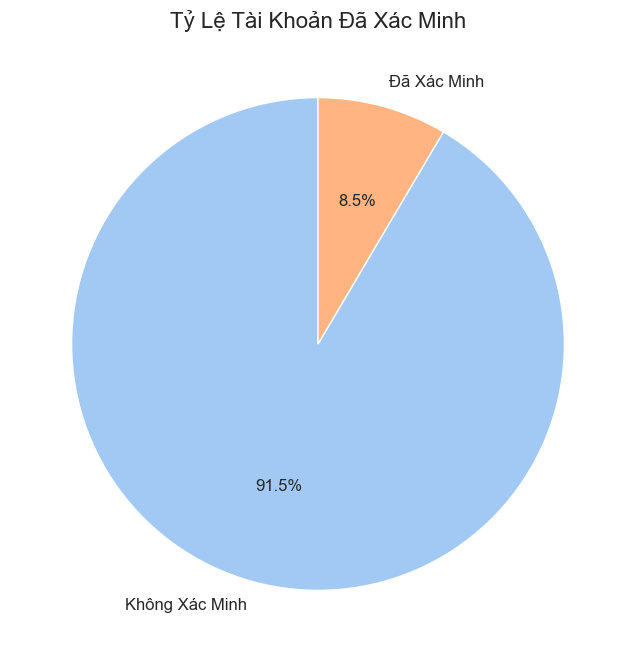

In [56]:
verified_counts = np.unique(data['user_verified'], return_counts=True)

if len(verified_counts[0]) == 2: 
    verified_ratio = verified_counts[1]
    labels = ['Không Xác Minh', 'Đã Xác Minh']
    
    plt.figure(figsize=(8, 8))
    plt.pie(verified_ratio, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Tỷ Lệ Tài Khoản Đã Xác Minh', fontsize=16)
    plt.show()

### **Ta thấy:** 
- Hầu như là tài khoản chưa được xác thực

"Tài khoản Verified (người nổi tiếng/tổ chức) có sức ảnh hưởng lớn hơn hẳn người thường không?"

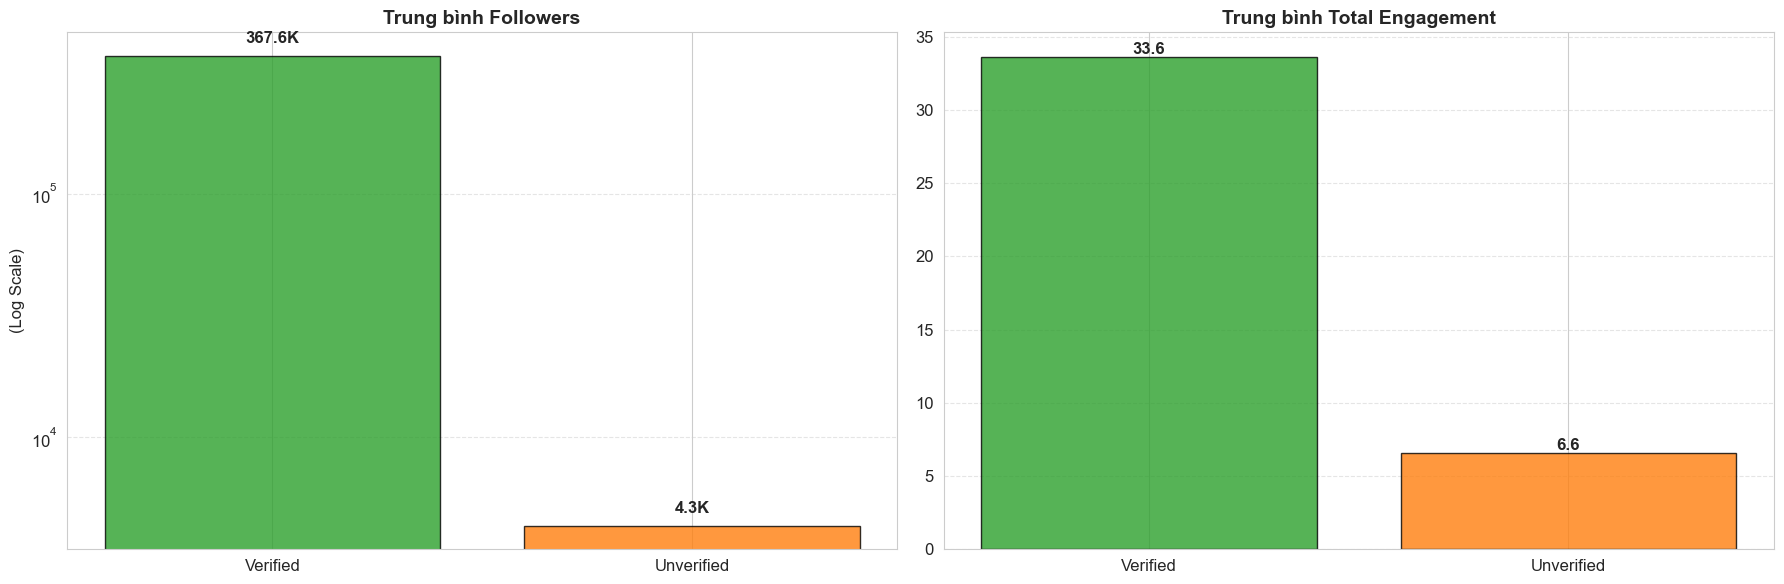

=== KẾT QUẢ SO SÁNH VERIFIED vs UNVERIFIED ===
Chỉ số               | Verified        | Unverified      | Chênh lệch (V/U)
-----------------------------------------------------------------
Followers            | 367623.35       | 4331.54         | 84.9x
Total Engagement     | 33.61           | 6.58            | 5.1x


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử 'new_data' là dữ liệu của bạn và đã có các cột 'engagement' và 'engagement_rate'
# Nếu chưa có, hãy đảm bảo bạn đã chạy các bước tính toán trước đó.

# --- 1. Tách nhóm Verified và Unverified ---
verified_mask = new_data['user_verified'].astype(bool)
unverified_mask = ~verified_mask

# --- 2. Tính toán các chỉ số trung bình ---
def get_avg(data, col_name):
    if len(data) == 0: return 0
    return np.nanmean(data[col_name].astype(float))

metrics = {
    'Followers': 'user_followers',
    'Total Engagement': 'engagement'
}

results = {
    'Verified': [],
    'Unverified': []
}

for metric, col in metrics.items():
    results['Verified'].append(get_avg(new_data[verified_mask], col))
    results['Unverified'].append(get_avg(new_data[unverified_mask], col))

# --- 3. Trực quan hóa so sánh (Bar Charts) ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
colors = ['#2ca02c', '#ff7f0e'] # Xanh lá (Verified), Cam (Unverified)
labels = ['Verified', 'Unverified']

for i, (metric_name, col_key) in enumerate(metrics.items()):
    ax = axes[i]
    values = [results['Verified'][i], results['Unverified'][i]]
    
    bars = ax.bar(labels, values, color=colors, alpha=0.8, edgecolor='black')
    
    ax.set_title(f'Trung bình {metric_name}', fontsize=14, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Xử lý scale cho Followers nếu chênh lệch quá lớn
    if col_key == 'user_followers':
        ax.set_yscale('log')
        ax.set_ylabel('(Log Scale)')
        
    # Hiển thị giá trị trên cột
    for bar, val in zip(bars, values):
        height = bar.get_height()
        if val > 1000:
            text = f'{val/1000:.1f}K'
        elif val < 1:
            text = f'{val:.4f}'
        else:
            text = f'{val:.1f}'
            
        # Đặt text ở vị trí thích hợp (trên cột hoặc ngay trên trục hoành nếu giá trị nhỏ)
        y_pos = height if col_key != 'user_followers' else height * 1.1 
        ax.text(bar.get_x() + bar.get_width()/2, y_pos, text, 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# --- 4. In kết quả chi tiết ---
print("=== KẾT QUẢ SO SÁNH VERIFIED vs UNVERIFIED ===")
print(f"{'Chỉ số':<20} | {'Verified':<15} | {'Unverified':<15} | {'Chênh lệch (V/U)'}")
print("-" * 65)

for i, metric in enumerate(metrics.keys()):
    v_val = results['Verified'][i]
    u_val = results['Unverified'][i]
    ratio = v_val / u_val if u_val > 0 else float('inf')
    print(f"{metric:<20} | {v_val:<15.2f} | {u_val:<15.2f} | {ratio:.1f}x")

---

### **Ta phân tích tới các nguồn, các nền tảng để đăng tweet.**

In [ ]:

source_col = data['source']

unique_sources = np.unique(source_col)
num_unique_sources = len(unique_sources)

print(f"Tổng số lượng nguồn là: {num_unique_sources}")

print(unique_sources)

Tổng số lượng nguồn là: 65
['' '24liveblog' 'Article Tweetbot' 'BizToc' 'BizToc News'
 'Blog2Social APP' 'Buffer' 'Business Upturn' 'Canva' 'CoSchedule'
 'ETRetail.com' 'EastMojo' 'Echobox' 'Echofon'
 'Falcon Social Media Management ' 'Fenix 2' 'Flying Eze' 'GT_Backend'
 'Hash#trends' 'Hocalwire Social Share' 'Hootsuite Inc.' 'Hypefury'
 'IFTTT' 'Imminent News' 'Instagram' 'LaterMedia' 'LinkedIn' 'Loomly'
 'Microsoft Power Platform' 'Nelio Content' 'News Medical' 'News Users'
 'Nonli' 'Paper.li' 'Publer ' 'Revive Social App'
 'SEMrush Social Media Tool' 'Salesforce - Social Studio' 'Sendible'
 'Social-Pull-Staging' 'SocialBee.io v2' 'SocialFlow' 'SocialNewsDesk'
 'Socialbakers' 'Sprinklr' 'Sprinklr Publishing' 'Sprout Social'
 'The Tweeted Times' 'ThreadReaderApp' 'Threader_client' 'Tumblr'
 'TweetCaster for Android' 'TweetDeck' 'Tweetbot for Mac'
 'Tweetbot for iΟS' 'Twitter Media Studio'
 'Twitter Media Studio - LiveCut' 'Twitter Web App' 'Twitter for Android'
 'Twitter for Mac' 'Twi

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8100\3218485942.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=all_sorted_counts, y=all_sorted_sources, palette='Paired')


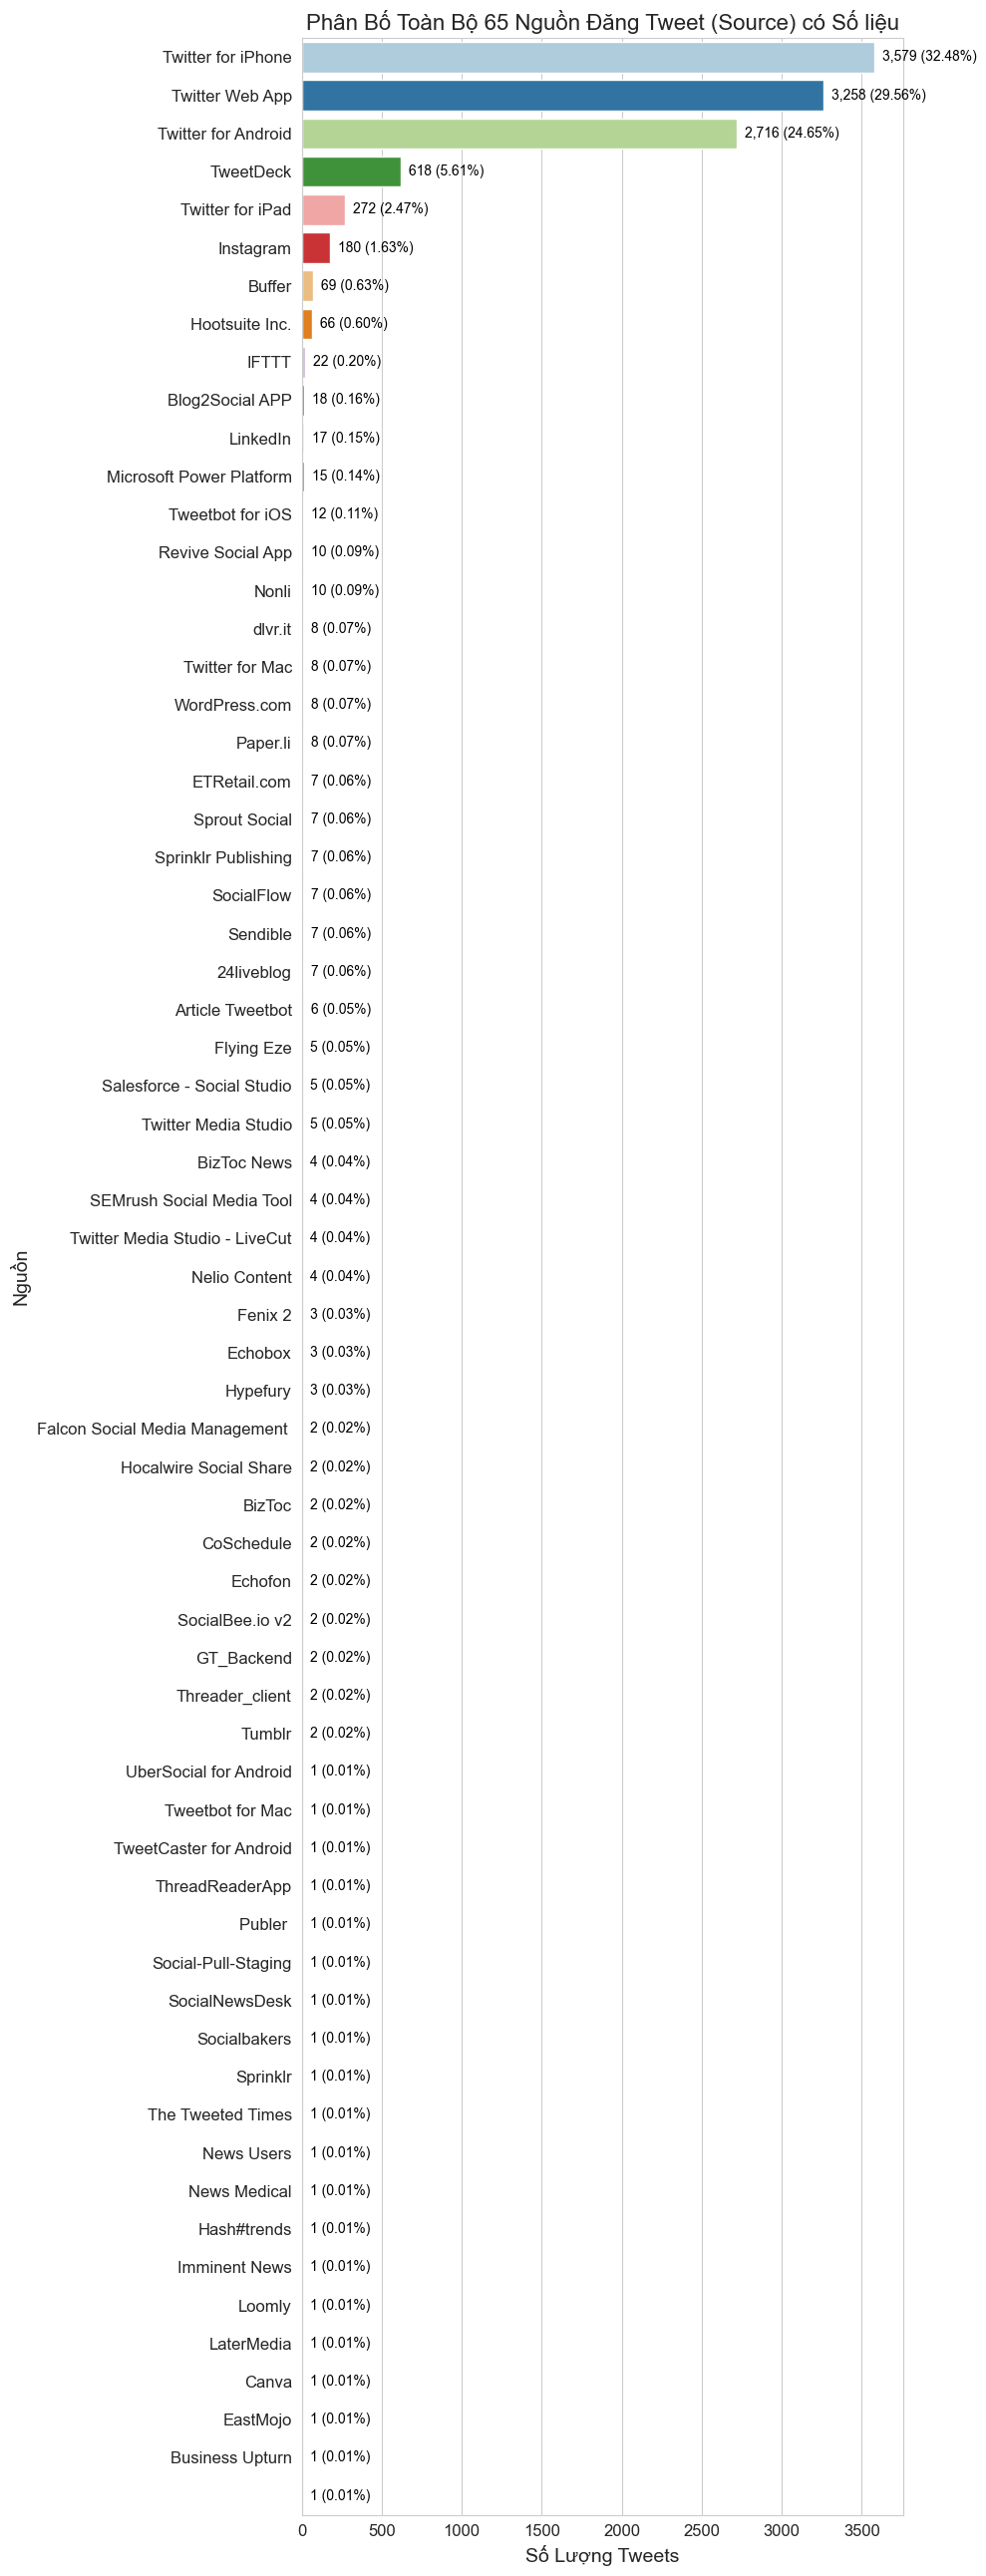

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Giả định 'data' là mảng NumPy có cấu trúc đã được tải
source_col = data['source']
unique_sources, counts = np.unique(source_col, return_counts=True)
total_rows = len(data) # Tổng số lượng bản ghi

# 1. Sắp xếp tất cả các nguồn theo số lượng giảm dần
sorted_indices = np.argsort(counts)[::-1]
all_sorted_sources_bytes = unique_sources[sorted_indices]
all_sorted_counts = counts[sorted_indices]

# 2. Chuyển byte string sang Unicode string để hiển thị trên biểu đồ
all_sorted_sources = [s.decode('utf-8') if isinstance(s, bytes) else s for s in all_sorted_sources_bytes]

# 3. Cấu hình và vẽ biểu đồ thanh
num_sources = len(all_sorted_sources)
fig_height = max(6, num_sources * 0.4) 

plt.figure(figsize=(10, fig_height))
# Tạo biểu đồ thanh ngang và lưu trục (axis) vào biến 'ax'
ax = sns.barplot(x=all_sorted_counts, y=all_sorted_sources, palette='Paired')

# 4. THÊM CHÚ THÍCH SỐ LƯỢNG VÀ TỈ LỆ (%)
for i, count in enumerate(all_sorted_counts):
    percentage = (count / total_rows) * 100
    # Định dạng chuỗi hiển thị: Số lượng (Tỉ lệ %)
    # Sử dụng dấu phẩy (,) cho số lớn và 2 chữ số thập phân cho %
    text = f'{count:,.0f} ({percentage:.2f}%)' 
    
    # Thêm văn bản vào cuối thanh (x=count, y=i)
    # x=count + (một khoảng padding nhỏ)
    ax.text(
        count + 50, # Đặt vị trí X nhích sang phải một chút
        i,          # Chỉ mục Y (vị trí thanh)
        text, 
        color='black', 
        ha='left', 
        va='center', 
        fontsize=10
    )

plt.title(f'Phân Bố Toàn Bộ {num_sources} Nguồn Đăng Tweet (Source) có Số liệu', fontsize=16)
plt.xlabel('Số Lượng Tweets', fontsize=14)
plt.ylabel('Nguồn', fontsize=14)
plt.tight_layout()
plt.show()

---

### **Ta được biết mỗi bài tweet có tối đa 280 ký tự, ta cũng xem xét trường `text` coi có gì lạ không**

Độ dài Tweet Trung bình: 129.44 ký tự
Độ dài Tweet Trung vị: 140 ký tự
Tweet dài nhất: 156 ký tự


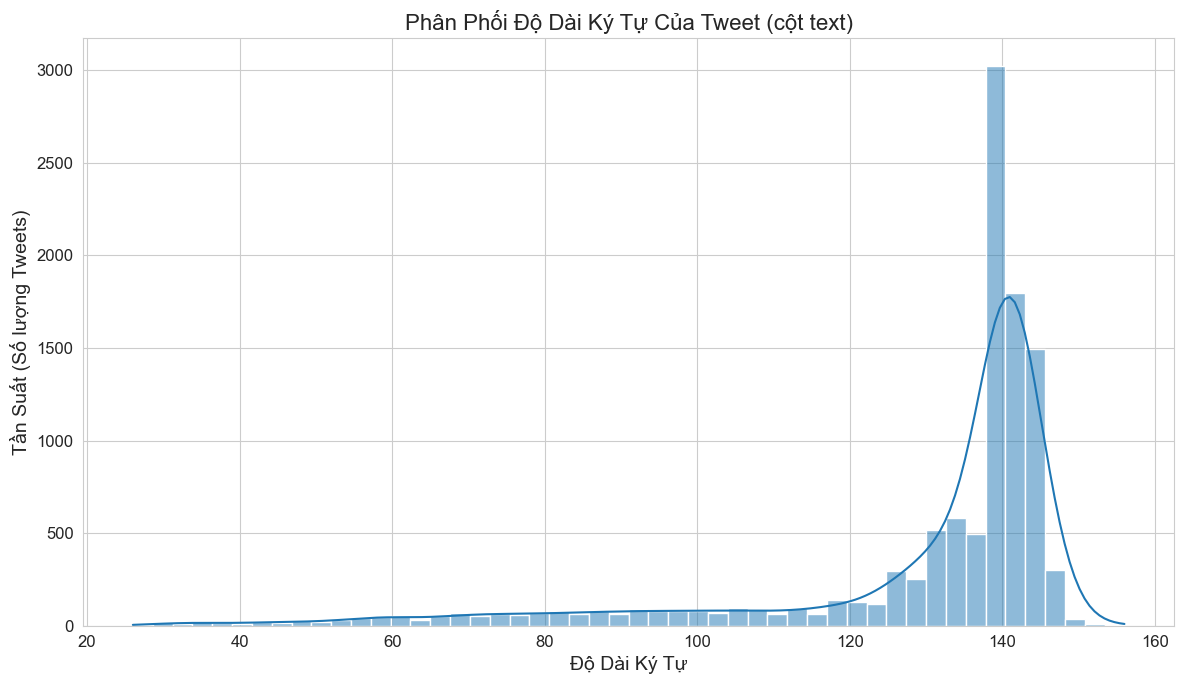

In [50]:

text_col = new_data['text']

tweet_lengths = np.char.str_len(text_col)

# Cột mới tweet_lengths
new_data = rfn.append_fields(
    base=new_data, 
    names='tweet_lengths', 
    data=tweet_lengths, 
    usemask=False
)

print(f"Độ dài Tweet Trung bình: {np.mean(tweet_lengths):.2f} ký tự")
print(f"Độ dài Tweet Trung vị: {np.median(tweet_lengths):.0f} ký tự")
print(f"Tweet dài nhất: {np.max(tweet_lengths)} ký tự")

plt.figure(figsize=(12, 7))
sns.histplot(tweet_lengths, bins=50, kde=True)
plt.title('Phân Phối Độ Dài Ký Tự Của Tweet (cột text)', fontsize=16)
plt.xlabel('Độ Dài Ký Tự', fontsize=14)
plt.ylabel('Tần Suất (Số lượng Tweets)', fontsize=14)
plt.tight_layout()


In [ ]:
import numpy as np
import re
from numpy.lib import recfunctions as rfn



# --- 2. Áp dụng hàm lên toàn bộ cột 'text' ---

# Sử dụng np.vectorize để áp dụng hàm Python lên mảng NumPy hiệu quả
v_count_hashtags = np.vectorize(count_hashtags)
v_count_mentions = np.vectorize(count_mentions)

# Tính toán các giá trị
hashtags_count = v_count_hashtags(new_data['text'])
mentions_count = v_count_mentions(new_data['text'])

# --- 3. Thêm trường mới vào Structured Array ---

# Thêm Hashtags Count
new_data = rfn.append_fields(
    base=new_data, 
    names='hashtags_count', 
    data=hashtags_count, 
    dtypes='<i8',
    usemask=False
)

# Thêm Mentions Count
new_data = rfn.append_fields(
    base=new_data, 
    names='mentions_count', 
    data=mentions_count, 
    dtypes='<i8',
    usemask=False
)

print("--- TẠO TRƯỜNG MỚI THÀNH CÔNG ---")
print("Đã thêm 'hashtags_count' và 'mentions_count' vào dữ liệu.")
print(f"Max Hashtags Count: {np.max(new_data['hashtags_count'])}")
print(f"Max Mentions Count: {np.max(new_data['mentions_count'])}")

--- TẠO TRƯỜNG MỚI THÀNH CÔNG ---
Đã thêm 'hashtags_count' và 'mentions_count' vào dữ liệu.
Max Hashtags Count: 11
Max Mentions Count: 12


Hashtag (#) thường chỉ là nhãn dán. Nội dung thực sự nằm trong text. Bạn cần biết người ta hay dùng những từ tính từ/động từ nào.

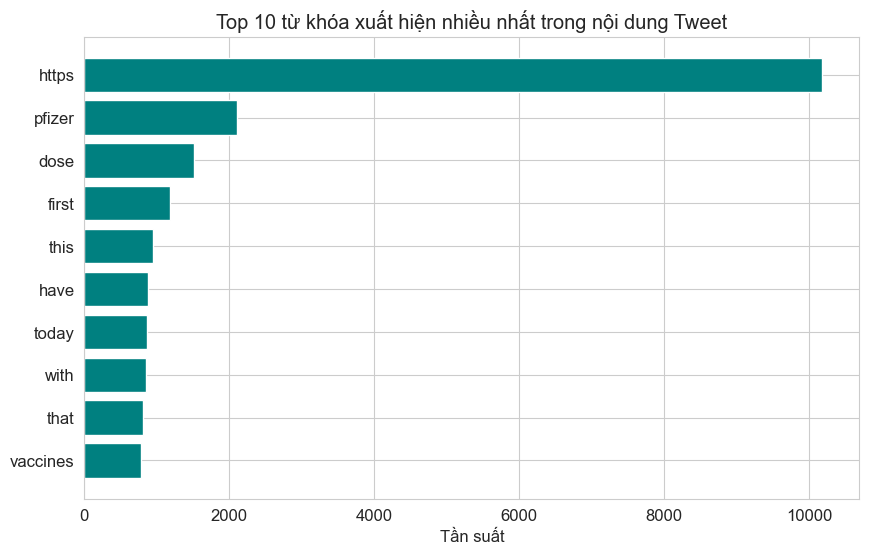

In [ ]:
# --- CELL MỚI: Top từ khóa xuất hiện trong nội dung tweet ---
all_text = new_data['text']
top_words = get_keywords(all_text) # Sử dụng lại hàm đã viết ở trên

# Vẽ biểu đồ ngang
words, freqs = zip(*top_words)
y_pos = np.arange(len(words))

plt.figure(figsize=(10, 6))
plt.barh(y_pos, freqs, align='center', color='teal')
plt.yticks(y_pos, words)
plt.xlabel('Tần suất')
plt.title('Top 10 từ khóa xuất hiện nhiều nhất trong nội dung Tweet')
plt.gca().invert_yaxis() # Đảo ngược để từ nhiều nhất lên đầu
plt.show()

---

### **Còn cột `Hashtag` thì sao?**

In [ ]:

hashtag_counter = Counter()
hashtag_col = new_data['hashtags']
total_rows = len(new_data)

for h_list_str in hashtag_col:
    # Làm sạch chuỗi: loại bỏ '[', ']', '"', "'" và khoảng trắng
    cleaned_str = str(h_list_str).strip("[]'\" ")
    
    if cleaned_str:
        # Tách chuỗi bằng dấu phẩy (và có thể có dấu cách hoặc chấm phẩy)
        tags = re.split(r"[',;]\s*", cleaned_str)
        
        # Cập nhật bộ đếm (lọc bỏ các chuỗi rỗng có thể xuất hiện sau khi split)
        hashtag_counter.update(tag.strip() for tag in tags if tag.strip())

# Lấy 15 hashtag phổ biến nhất
top_15_hashtags = hashtag_counter.most_common(15)

print(f"{'Hashtag':<30}{'Số Lượng (Count)':>18}{'Tỉ Lệ (%)':>15}")
print("-" * 63)

for label, count in top_15_hashtags:
    percentage = (count / total_rows) * 100
    # Sử dụng định dạng hàng nghìn (,) cho số lượng và thêm dấu #
    print(f"#{label:<29}{count:>18,}{percentage:>14.2f}%")
print("-" * 63)
print(f"Tổng số Tweet: {total_rows:,}")
print(f"Tổng số Hashtag duy nhất: {len(hashtag_counter):,}")

Hashtag                         Số Lượng (Count)      Tỉ Lệ (%)
---------------------------------------------------------------
#PfizerBioNTech                            4,161         37.76%
#PfizerBiontech                            1,432         12.99%
#COVID19                                   1,185         10.75%
#vaccine                                     879          7.98%
#Pfizer                                      654          5.93%
#CovidVaccine                                619          5.62%
#Moderna                                     384          3.48%
#PfizerVaccine                               315          2.86%
#AstraZeneca                                 270          2.45%
#pfizerbiontech                              256          2.32%
#coronavirus                                 228          2.07%
#COVID19Vaccine                              211          1.91%
#vaccines                                    211          1.91%
#Covid19                                

### Có nhiều dữ liệu trùng ý nghĩa nhau -> cần xử lý thêm

---

### **Còn về cột `user_location`**

In [ ]:

location_col = data['user_location']

# Kiểm tra cả chuỗi byte rỗng (b'') và chuỗi unicode rỗng ('')
valid_locations = location_col[(location_col != b'') & (location_col != '')]

# Đếm
unique_values, counts = np.unique(valid_locations, return_counts=True)

# sắp xếp
sorted_indices = np.argsort(counts)[::-1]

# Sắp xếp lại giá trị duy nhất và số đếm
sorted_unique_values = unique_values[sorted_indices]
sorted_counts = counts[sorted_indices]


print("--- NumPy Equivalent of df['user_location'].value_counts() (Top 10) ---")

for value, count in zip(sorted_unique_values[:10], sorted_counts[:10]):
    display_value = value.decode('utf-8') if isinstance(value, bytes) else str(value)
    print(f"{display_value:<30} {count}")

print(f"\n... (Tổng số vị trí duy nhất không rỗng: {len(unique_values)})")

--- NumPy Equivalent of df['user_location'].value_counts() (Top 10) ---
Malaysia                       168
"London; England"              142
India                          127
Petaling Jaya                  106
London                         95
Canada                         90
Hong Kong                      80
United Kingdom                 77
"Weinheim; Germany"            76
United Arab Emirates           73

... (Tổng số vị trí duy nhất không rỗng: 3136)


### Có các dữ liệu có vẻ chung ý nghĩa với nhau -> cần xử lý thêm

---

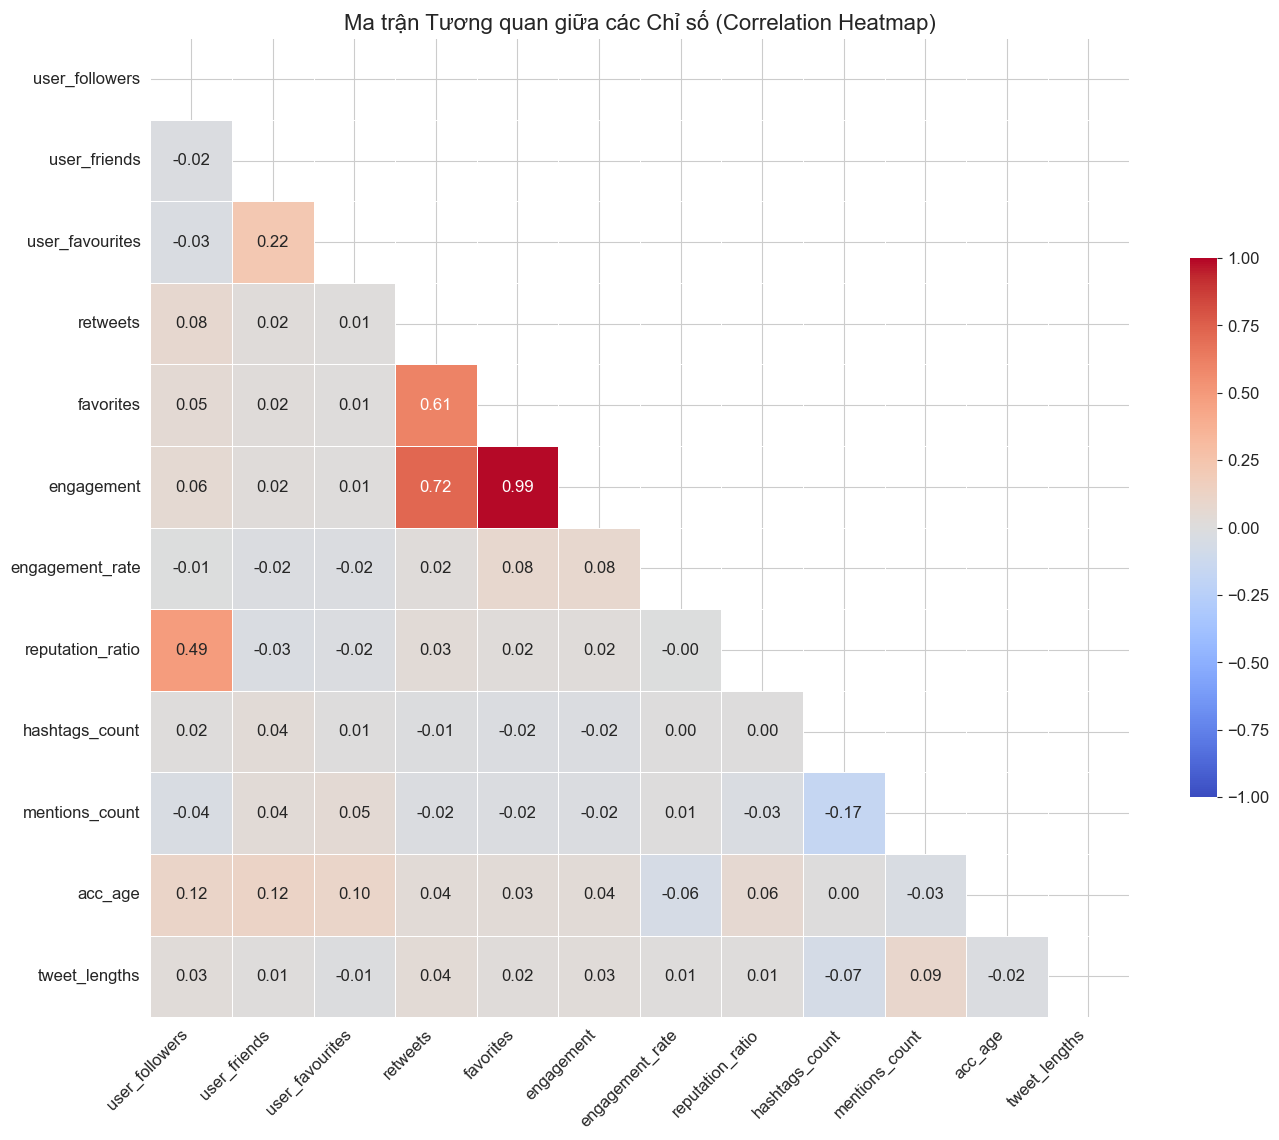

In [ ]:
# --- 1. Chuẩn bị các trường số liệu ---

# Danh sách các cột muốn phân tích tương quan
cols_to_analyze = [
    'user_followers', 
    'user_friends', 
    'user_favourites', 
    'retweets', 
    'favorites', 
    'engagement', 
    'engagement_rate', 
    'reputation_ratio', 
    'hashtags_count', 
    'mentions_count',
    'acc_age',        # Cần đảm bảo là số (ngày)
    'tweet_lengths'
]

# Dictionary để lưu dữ liệu các cột
data_dict = {}

for col in cols_to_analyze:
    # Kiểm tra xem cột có tồn tại trong dữ liệu không
    if col in new_data.dtype.names:
        arr = new_data[col]
        
        # Xử lý đặc biệt cho acc_age nếu nó là timedelta
        if col == 'acc_age' and np.issubdtype(arr.dtype, np.timedelta64):
            arr = arr.astype('timedelta64[D]').astype(float)
        
        data_dict[col] = arr.astype(float)
    else:
        print(f"Cảnh báo: Cột '{col}' chưa có trong dữ liệu. Bỏ qua.")

# Nếu 'tweet_lengths' chưa có, tính nhanh từ cột 'text'
if 'tweet_lengths' not in data_dict and 'text' in new_data.dtype.names:
    print("Đang tính toán 'tweet_lengths'...")
    # Xử lý decode nếu là bytes
    texts = new_data['text']
    lengths = []
    for t in texts:
        if isinstance(t, bytes):
            t = t.decode('utf-8')
        lengths.append(len(str(t)))
    data_dict['tweet_lengths'] = np.array(lengths, dtype=float)

# --- 2. Tạo Ma trận Tương quan ---

# Lấy danh sách keys cuối cùng có dữ liệu
final_cols = list(data_dict.keys())
# Stack các mảng thành ma trận (cột = feature, hàng = sample)
data_matrix = np.column_stack([data_dict[c] for c in final_cols])

# Tính ma trận tương quan Pearson
# Lưu ý: Dữ liệu MXH thường lệch, Pearson có thể bị ảnh hưởng bởi outliers.
# Tuy nhiên, nó vẫn là chuẩn mực đầu tiên.
corr_matrix = np.corrcoef(data_matrix, rowvar=False)

# --- 3. Vẽ Heatmap ---

plt.figure(figsize=(14, 12))

# Tạo mask để che nửa trên của ma trận (vì đối xứng) giúp dễ nhìn hơn
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    annot=True,           # Hiển thị số
    fmt=".2f",            # Làm tròn 2 chữ số thập phân
    cmap='coolwarm',      # Màu: Đỏ (Dương) - Xanh (Âm)
    vmin=-1, vmax=1,      # Giới hạn thang màu
    center=0,             # Trung tâm là 0 (Trắng)
    mask=mask,            # Che nửa trên
    xticklabels=final_cols,
    yticklabels=final_cols,
    square=True,          # Ô vuông
    linewidths=.5,        # Viền trắng giữa các ô
    cbar_kws={"shrink": .5} # Thu nhỏ thanh màu
)

plt.title('Ma trận Tương quan giữa các Chỉ số (Correlation Heatmap)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Lưu các dư liệu để chuyển qua quá trình tiền xử lý dữ liệu** 

In [ ]:

output_file = r'..\data\processed\processed_v1.npy'

# Sử dụng np.save để lưu mảng NumPy có cấu trúc
# lưu lại thuộc tính của newdata 
np.save(output_file, new_data)

print(f"Đã lưu mảng 'new_data' vào file binary: {output_file}")

Đã lưu mảng 'new_data' vào file binary: ..\data\processed\processed_v1.npy
